In [1]:
from datetime import datetime
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

def sturges(data): 
    return int((1 + 3.3 * np.log10(len(data))))

df_smart_tv = pd.read_csv('dataset_smart-tv.csv', usecols = ['date_hour','bytes_up', 'bytes_down'])
df_chromecast = pd.read_csv('dataset_chromecast.csv', usecols = ['date_hour','bytes_up', 'bytes_down'])

df_smart_tv[['bytes_up', 'bytes_down']] += 1
df_chromecast[['bytes_up', 'bytes_down']] += 1

df_smart_tv = pd.concat([df_smart_tv["date_hour"], np.log10(df_smart_tv[['bytes_up', 'bytes_down']])], axis=1)
df_chromecast = pd.concat([df_chromecast["date_hour"], np.log10(df_chromecast[['bytes_up', 'bytes_down']])], axis=1)

values = df_smart_tv["date_hour"]
converted_values = []
for x in values:
    try:
        converted_values += [datetime.strptime(x, "%Y-%m-%d %H:%M:%S").hour]
    except:
        converted_values += [x]

df_smart_tv["date_hour"] = converted_values

values = df_chromecast["date_hour"]
converted_values = []
for x in values:
    try:
        converted_values += [datetime.strptime(x, "%Y-%m-%d %H:%M:%S").hour]
    except:
        converted_values += [x]

df_chromecast["date_hour"] = converted_values

df_smart_tv, df_chromecast

(         date_hour  bytes_up  bytes_down
 0               15  5.123636    6.449963
 1               15  5.063602    6.354955
 2               15  5.057023    6.363475
 3               15  4.987539    6.302449
 4               15  4.597372    5.906413
 ...            ...       ...         ...
 4417898         23  0.954243    0.954243
 4417899         23  0.954243    0.954243
 4417900         23  0.954243    0.954243
 4417901         23  0.954243    0.954243
 4417902         23  0.954243    1.518514
 
 [4417903 rows x 3 columns],
          date_hour  bytes_up  bytes_down
 0                0  3.475383    4.691848
 1                0  2.836916    2.517536
 2                0  3.652720    4.578812
 3                0  2.890496    2.362105
 4                0  3.488877    4.713136
 ...            ...       ...         ...
 1620524         16  3.306425    4.637820
 1620525         16  3.850585    3.202216
 1620526         16  2.689309    4.695771
 1620527         16  0.000000    2.136721
 16

In [2]:
data_set_1 = df_smart_tv.groupby("date_hour")["bytes_up"].median().argmax()
data_set_2 = df_smart_tv.groupby("date_hour")["bytes_up"].mean().argmax()
data_set_3 = df_smart_tv.groupby("date_hour")["bytes_down"].median().argmax()
data_set_4 = df_smart_tv.groupby("date_hour")["bytes_down"].mean().argmax()
data_set_5 = df_chromecast.groupby("date_hour")["bytes_up"].median().argmax()
data_set_6 = df_chromecast.groupby("date_hour")["bytes_up"].mean().argmax()
data_set_7 = df_chromecast.groupby("date_hour")["bytes_down"].median().argmax()
data_set_8 = df_chromecast.groupby("date_hour")["bytes_down"].mean().argmax()

data_set_1, data_set_2, data_set_3, data_set_4, data_set_5, data_set_6, data_set_7, data_set_8

(20, 20, 20, 20, 22, 22, 23, 23)

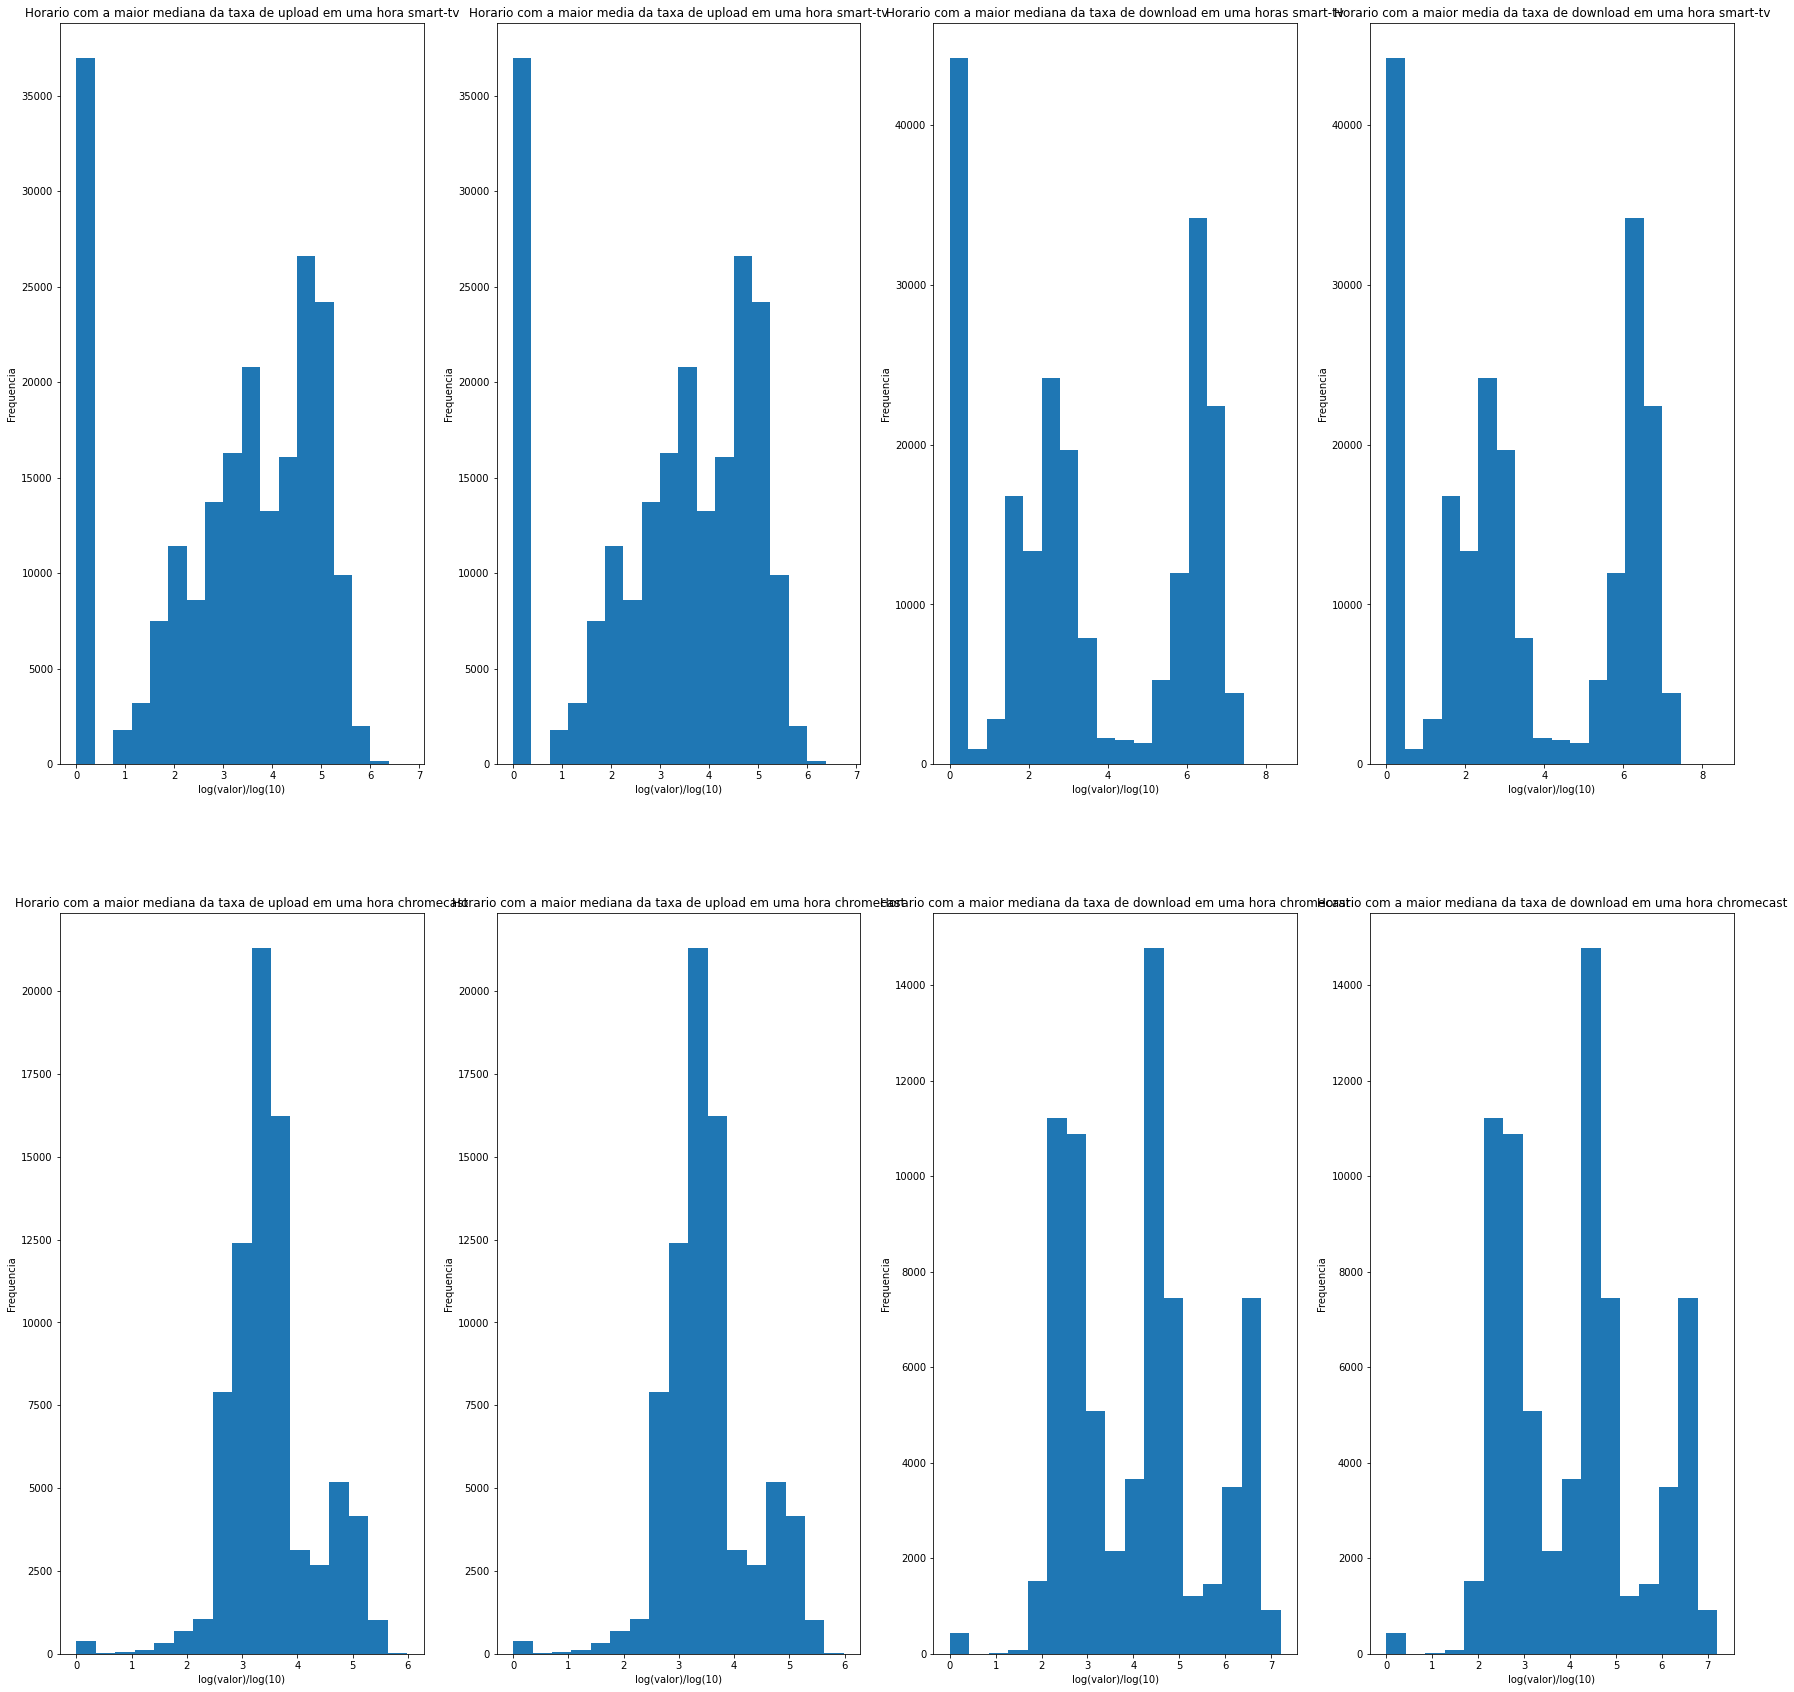

In [3]:
fig, ax = plt.subplots(2, 4, figsize=(30, 30))

ds_1 = df_smart_tv.query('date_hour == @data_set_1')['bytes_up']
ax[0][0].hist(ds_1, bins=sturges(ds_1))
ax[0][0].set_title("Horario com a maior mediana da taxa de upload em uma hora smart-tv")
ax[0][0].set_xlabel("log(valor)/log(10)")
ax[0][0].set_ylabel("Frequencia")

ds_2 = df_smart_tv.query('date_hour == @data_set_2')['bytes_up']
ax[0][1].hist(ds_2, bins=sturges(ds_2))
ax[0][1].set_title("Horario com a maior media da taxa de upload em uma hora smart-tv")
ax[0][1].set_xlabel("log(valor)/log(10)")
ax[0][1].set_ylabel("Frequencia")

ds_3 = df_smart_tv.query('date_hour == @data_set_3')['bytes_down']
ax[0][2].hist(ds_3, bins=sturges(ds_3))
ax[0][2].set_title("Horario com a maior mediana da taxa de download em uma horas smart-tv")
ax[0][2].set_xlabel("log(valor)/log(10)")
ax[0][2].set_ylabel("Frequencia")

ds_4 = df_smart_tv.query('date_hour == @data_set_4')['bytes_down']
ax[0][3].hist(ds_4, bins=sturges(ds_4))
ax[0][3].set_title("Horario com a maior media da taxa de download em uma hora smart-tv")
ax[0][3].set_xlabel("log(valor)/log(10)")
ax[0][3].set_ylabel("Frequencia")

ds_5 = df_chromecast.query('date_hour == @data_set_5')['bytes_up']
ax[1][0].hist(ds_5, bins=sturges(ds_5))
ax[1][0].set_title("Horario com a maior mediana da taxa de upload em uma hora chromecast")
ax[1][0].set_xlabel("log(valor)/log(10)")
ax[1][0].set_ylabel("Frequencia")

ds_6 = df_chromecast.query('date_hour == @data_set_6')['bytes_up']
ax[1][1].hist(ds_6, bins=sturges(ds_6))
ax[1][1].set_title("Horario com a maior mediana da taxa de upload em uma hora chromecast")
ax[1][1].set_xlabel("log(valor)/log(10)")
ax[1][1].set_ylabel("Frequencia")

ds_7 = df_chromecast.query('date_hour == @data_set_7')['bytes_down']
ax[1][2].hist(ds_7, bins=sturges(ds_7))
ax[1][2].set_title("Horario com a maior mediana da taxa de download em uma hora chromecast")
ax[1][2].set_xlabel("log(valor)/log(10)")
ax[1][2].set_ylabel("Frequencia")

ds_8 = df_chromecast.query('date_hour == @data_set_8')['bytes_down']
ax[1][3].hist(ds_8, bins=sturges(ds_8))
ax[1][3].set_title("Horario com a maior mediana da taxa de download em uma hora chromecast")
ax[1][3].set_xlabel("log(valor)/log(10)")
ax[1][3].set_ylabel("Frequencia")

plt.show()

In [4]:
gaussiana_mean = []
gaussiana_var = []
gaussiana_mean += [np.mean(ds_1)]
gaussiana_var += [np.var(ds_1)]
gaussiana_mean += [np.mean(ds_2)]
gaussiana_var += [np.var(ds_2)]
gaussiana_mean += [np.mean(ds_3)]
gaussiana_var += [np.var(ds_3)]
gaussiana_mean += [np.mean(ds_4)]
gaussiana_var += [np.var(ds_4)]
gaussiana_mean += [np.mean(ds_5)]
gaussiana_var += [np.var(ds_5)]
gaussiana_mean += [np.mean(ds_6)]
gaussiana_var += [np.var(ds_6)]
gaussiana_mean += [np.mean(ds_7)]
gaussiana_var += [np.var(ds_7)]
gaussiana_mean += [np.mean(ds_8)]
gaussiana_var += [np.var(ds_8)]
gaussiana_mean, gaussiana_var

([3.124258107506722,
  3.124258107506722,
  3.3960945564366285,
  3.3960945564366285,
  3.521546370674634,
  3.521546370674634,
  4.052698112658847,
  4.052698112658847],
 [3.1687396722855117,
  3.1687396722855117,
  6.201343416532805,
  6.201343416532805,
  0.5957117566059509,
  0.5957117566059509,
  2.1593591160465606,
  2.1593591160465606])

In [5]:
from scipy.stats import gamma

mle_gamma = []
mle_gamma += [gamma.fit(ds_1)]
mle_gamma += [gamma.fit(ds_2)]
mle_gamma += [gamma.fit(ds_3)]
mle_gamma += [gamma.fit(ds_4)]
mle_gamma += [gamma.fit(ds_5)]
mle_gamma += [gamma.fit(ds_6)]
mle_gamma += [gamma.fit(ds_7)]
mle_gamma += [gamma.fit(ds_8)]

mle_gamma

[(220.48073768362616, -23.96174486447611, 0.12272309565740211),
 (220.48073768362616, -23.96174486447611, 0.12272309565740211),
 (896.5469322463027, -71.06216506397283, 0.08304989773768084),
 (896.5469322463027, -71.06216506397283, 0.08304989773768084),
 (3148.8815211215233, -39.80898262399852, 0.013760617087012861),
 (3148.8815211215233, -39.80898262399852, 0.013760617087012861),
 (27.130143662628548, -3.631368185066651, 0.2832298335465073),
 (27.130143662628548, -3.631368185066651, 0.2832298335465073)]

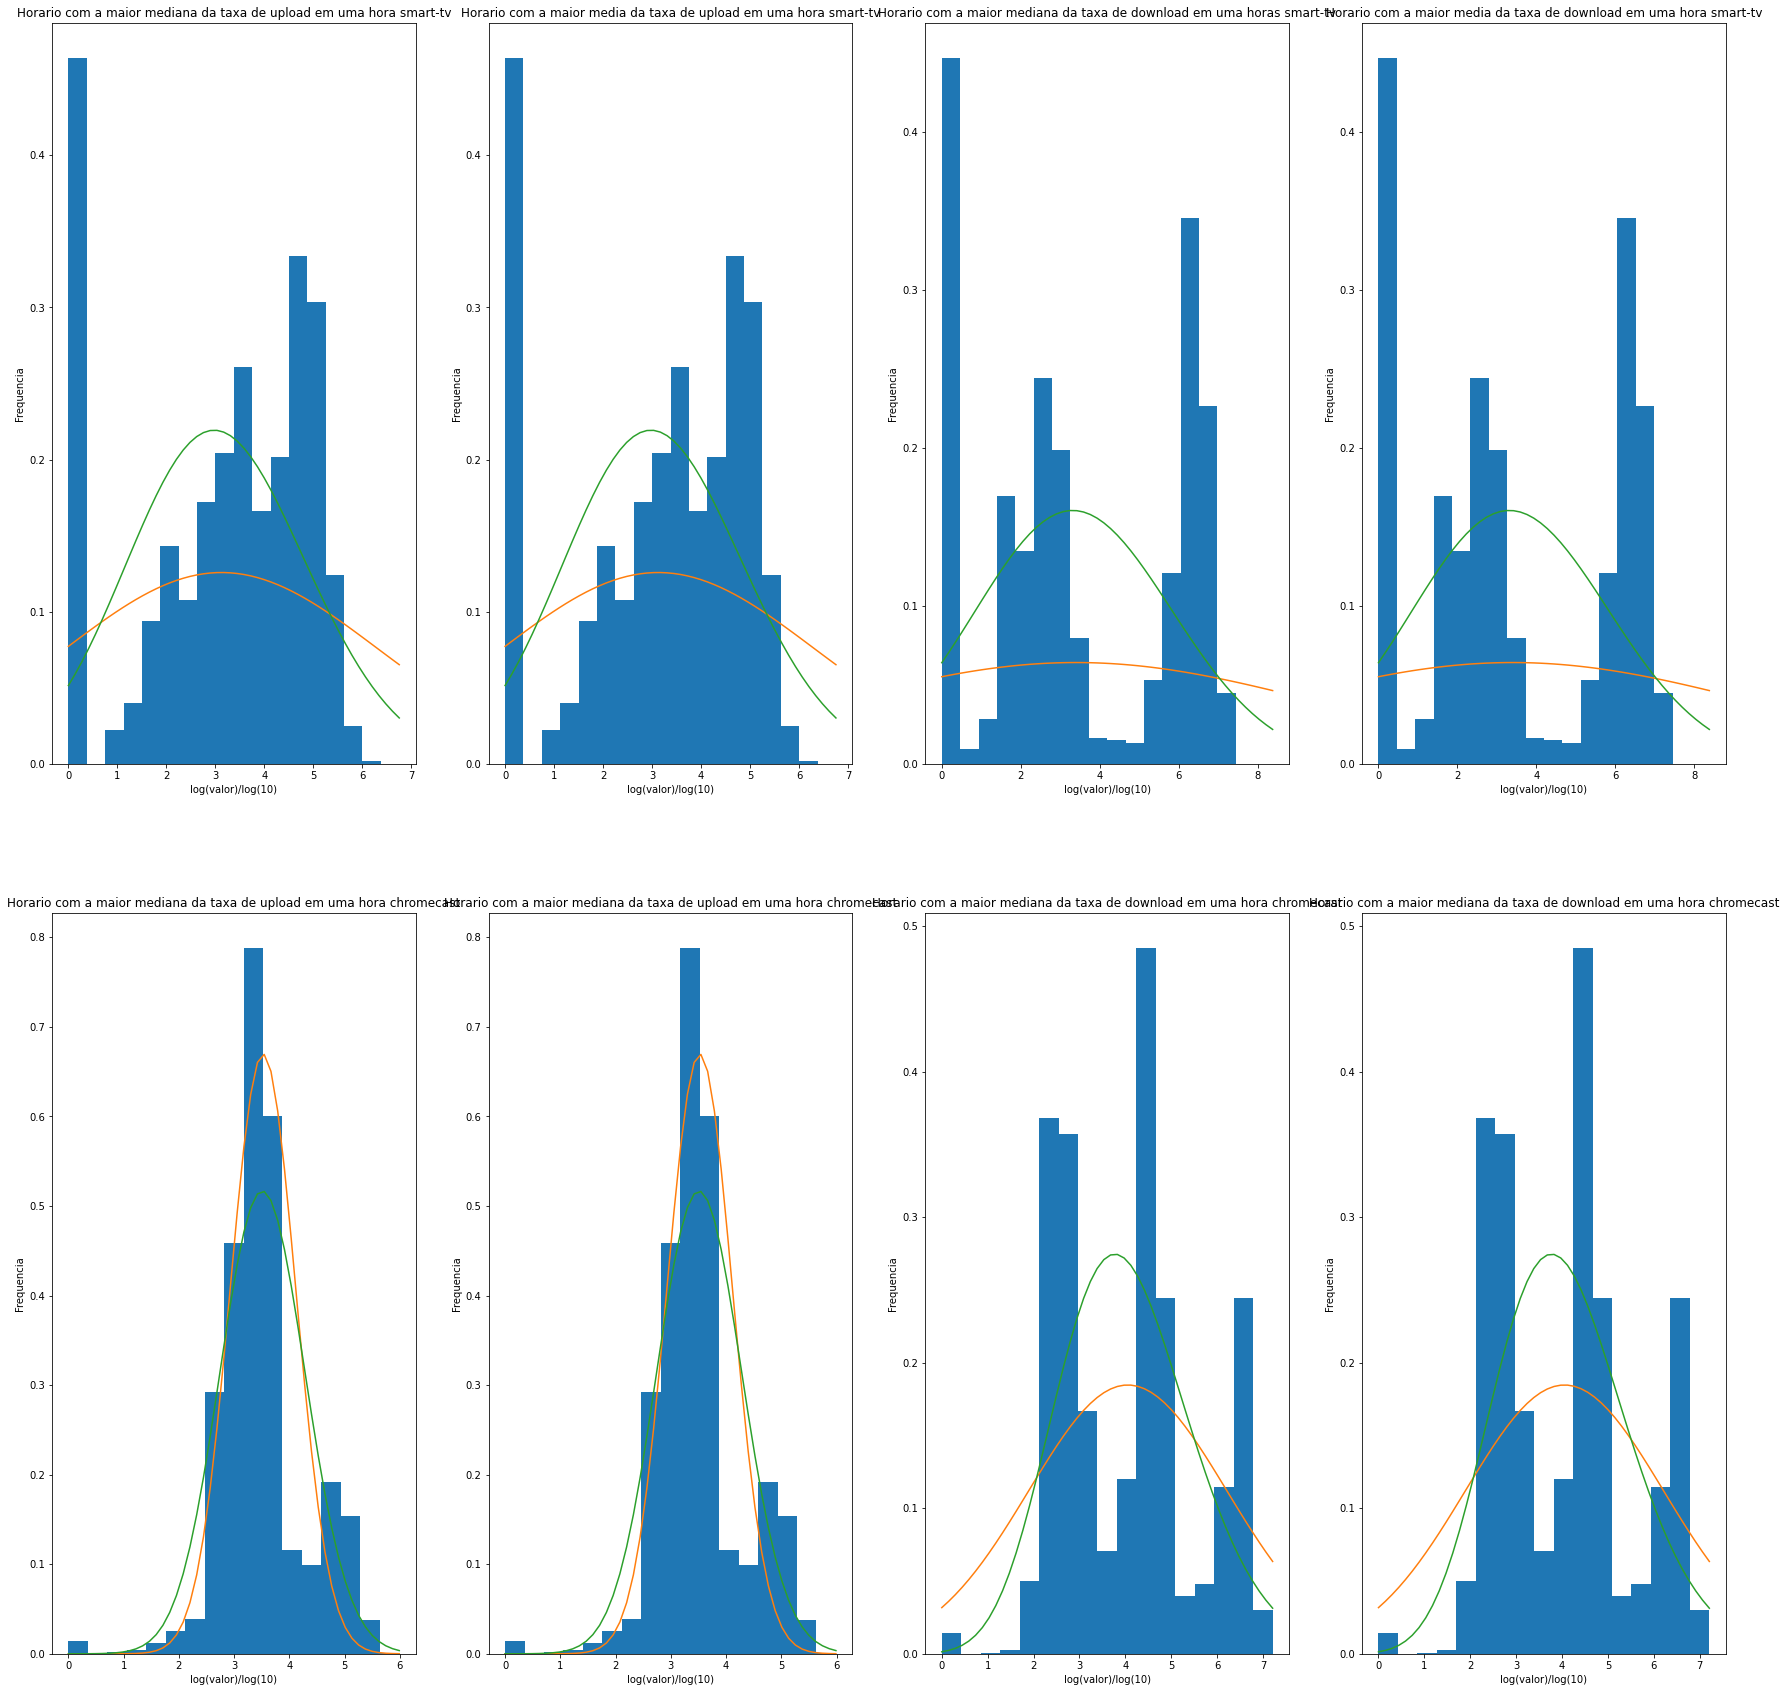

In [6]:
from scipy.stats import norm

fig, ax = plt.subplots(2, 4, figsize=(30, 30))

ax[0][0].hist(ds_1, bins=sturges(ds_1), density=True)
x = np.linspace(min(ds_1), max(ds_1))
ax[0][0].plot(x, norm.pdf(x, gaussiana_mean[0], gaussiana_var[0]))
ax[0][0].plot(x, gamma.pdf(x, mle_gamma[0][0],  mle_gamma[0][1], mle_gamma[0][2]))
ax[0][0].set_title("Horario com a maior mediana da taxa de upload em uma hora smart-tv")
ax[0][0].set_xlabel("log(valor)/log(10)")
ax[0][0].set_ylabel("Frequencia")

ax[0][1].hist(ds_2, bins=sturges(ds_2), density=True)
x = np.linspace(min(ds_2), max(ds_2))
ax[0][1].plot(x, norm.pdf(x, gaussiana_mean[1], gaussiana_var[1]))
ax[0][1].plot(x, gamma.pdf(x, mle_gamma[1][0],  mle_gamma[1][1], mle_gamma[1][2]))
ax[0][1].set_title("Horario com a maior media da taxa de upload em uma hora smart-tv")
ax[0][1].set_xlabel("log(valor)/log(10)")
ax[0][1].set_ylabel("Frequencia")

ax[0][2].hist(ds_3, bins=sturges(ds_3), density=True)
x = np.linspace(min(ds_3), max(ds_3))
ax[0][2].plot(x, norm.pdf(x, gaussiana_mean[2], gaussiana_var[2]))
ax[0][2].plot(x, gamma.pdf(x, mle_gamma[2][0],  mle_gamma[2][1], mle_gamma[2][2]))
ax[0][2].set_title("Horario com a maior mediana da taxa de download em uma horas smart-tv")
ax[0][2].set_xlabel("log(valor)/log(10)")
ax[0][2].set_ylabel("Frequencia")

ax[0][3].hist(ds_4, bins=sturges(ds_4),density=True)
x = np.linspace(min(ds_4), max(ds_4))
ax[0][3].plot(x, norm.pdf(x, gaussiana_mean[3], gaussiana_var[3]))
ax[0][3].plot(x, gamma.pdf(x, mle_gamma[3][0],  mle_gamma[3][1], mle_gamma[3][2]))
ax[0][3].set_title("Horario com a maior media da taxa de download em uma hora smart-tv")
ax[0][3].set_xlabel("log(valor)/log(10)")
ax[0][3].set_ylabel("Frequencia")

ax[1][0].hist(ds_5, bins=sturges(ds_5), density=True)
x = np.linspace(min(ds_5), max(ds_5))
ax[1][0].plot(x, norm.pdf(x, gaussiana_mean[4], gaussiana_var[4]))
ax[1][0].plot(x, gamma.pdf(x, mle_gamma[4][0],  mle_gamma[4][1], mle_gamma[4][2]))
ax[1][0].set_title("Horario com a maior mediana da taxa de upload em uma hora chromecast")
ax[1][0].set_xlabel("log(valor)/log(10)")
ax[1][0].set_ylabel("Frequencia")

ax[1][1].hist(ds_6, bins=sturges(ds_6), density=True)
x = np.linspace(min(ds_6), max(ds_6))
ax[1][1].plot(x, norm.pdf(x, gaussiana_mean[5], gaussiana_var[5]))
ax[1][1].plot(x, gamma.pdf(x, mle_gamma[5][0],  mle_gamma[5][1], mle_gamma[5][2]))
ax[1][1].set_title("Horario com a maior mediana da taxa de upload em uma hora chromecast")
ax[1][1].set_xlabel("log(valor)/log(10)")
ax[1][1].set_ylabel("Frequencia")

ax[1][2].hist(ds_7, bins=sturges(ds_7), density=True)
x = np.linspace(min(ds_7), max(ds_7))
ax[1][2].plot(x, norm.pdf(x, gaussiana_mean[6], gaussiana_var[6]))
ax[1][2].plot(x, gamma.pdf(x, mle_gamma[6][0],  mle_gamma[6][1], mle_gamma[6][2]))
ax[1][2].set_title("Horario com a maior mediana da taxa de download em uma hora chromecast")
ax[1][2].set_xlabel("log(valor)/log(10)")
ax[1][2].set_ylabel("Frequencia")

ax[1][3].hist(ds_8, bins=sturges(ds_8), density=True)
x = np.linspace(min(ds_8), max(ds_8))
ax[1][3].plot(x, norm.pdf(x, gaussiana_mean[7], gaussiana_var[7]))
ax[1][3].plot(x, gamma.pdf(x, mle_gamma[7][0],  mle_gamma[7][1], mle_gamma[7][2]))
ax[1][3].set_title("Horario com a maior mediana da taxa de download em uma hora chromecast")
ax[1][3].set_xlabel("log(valor)/log(10)")
ax[1][3].set_ylabel("Frequencia")

plt.show()

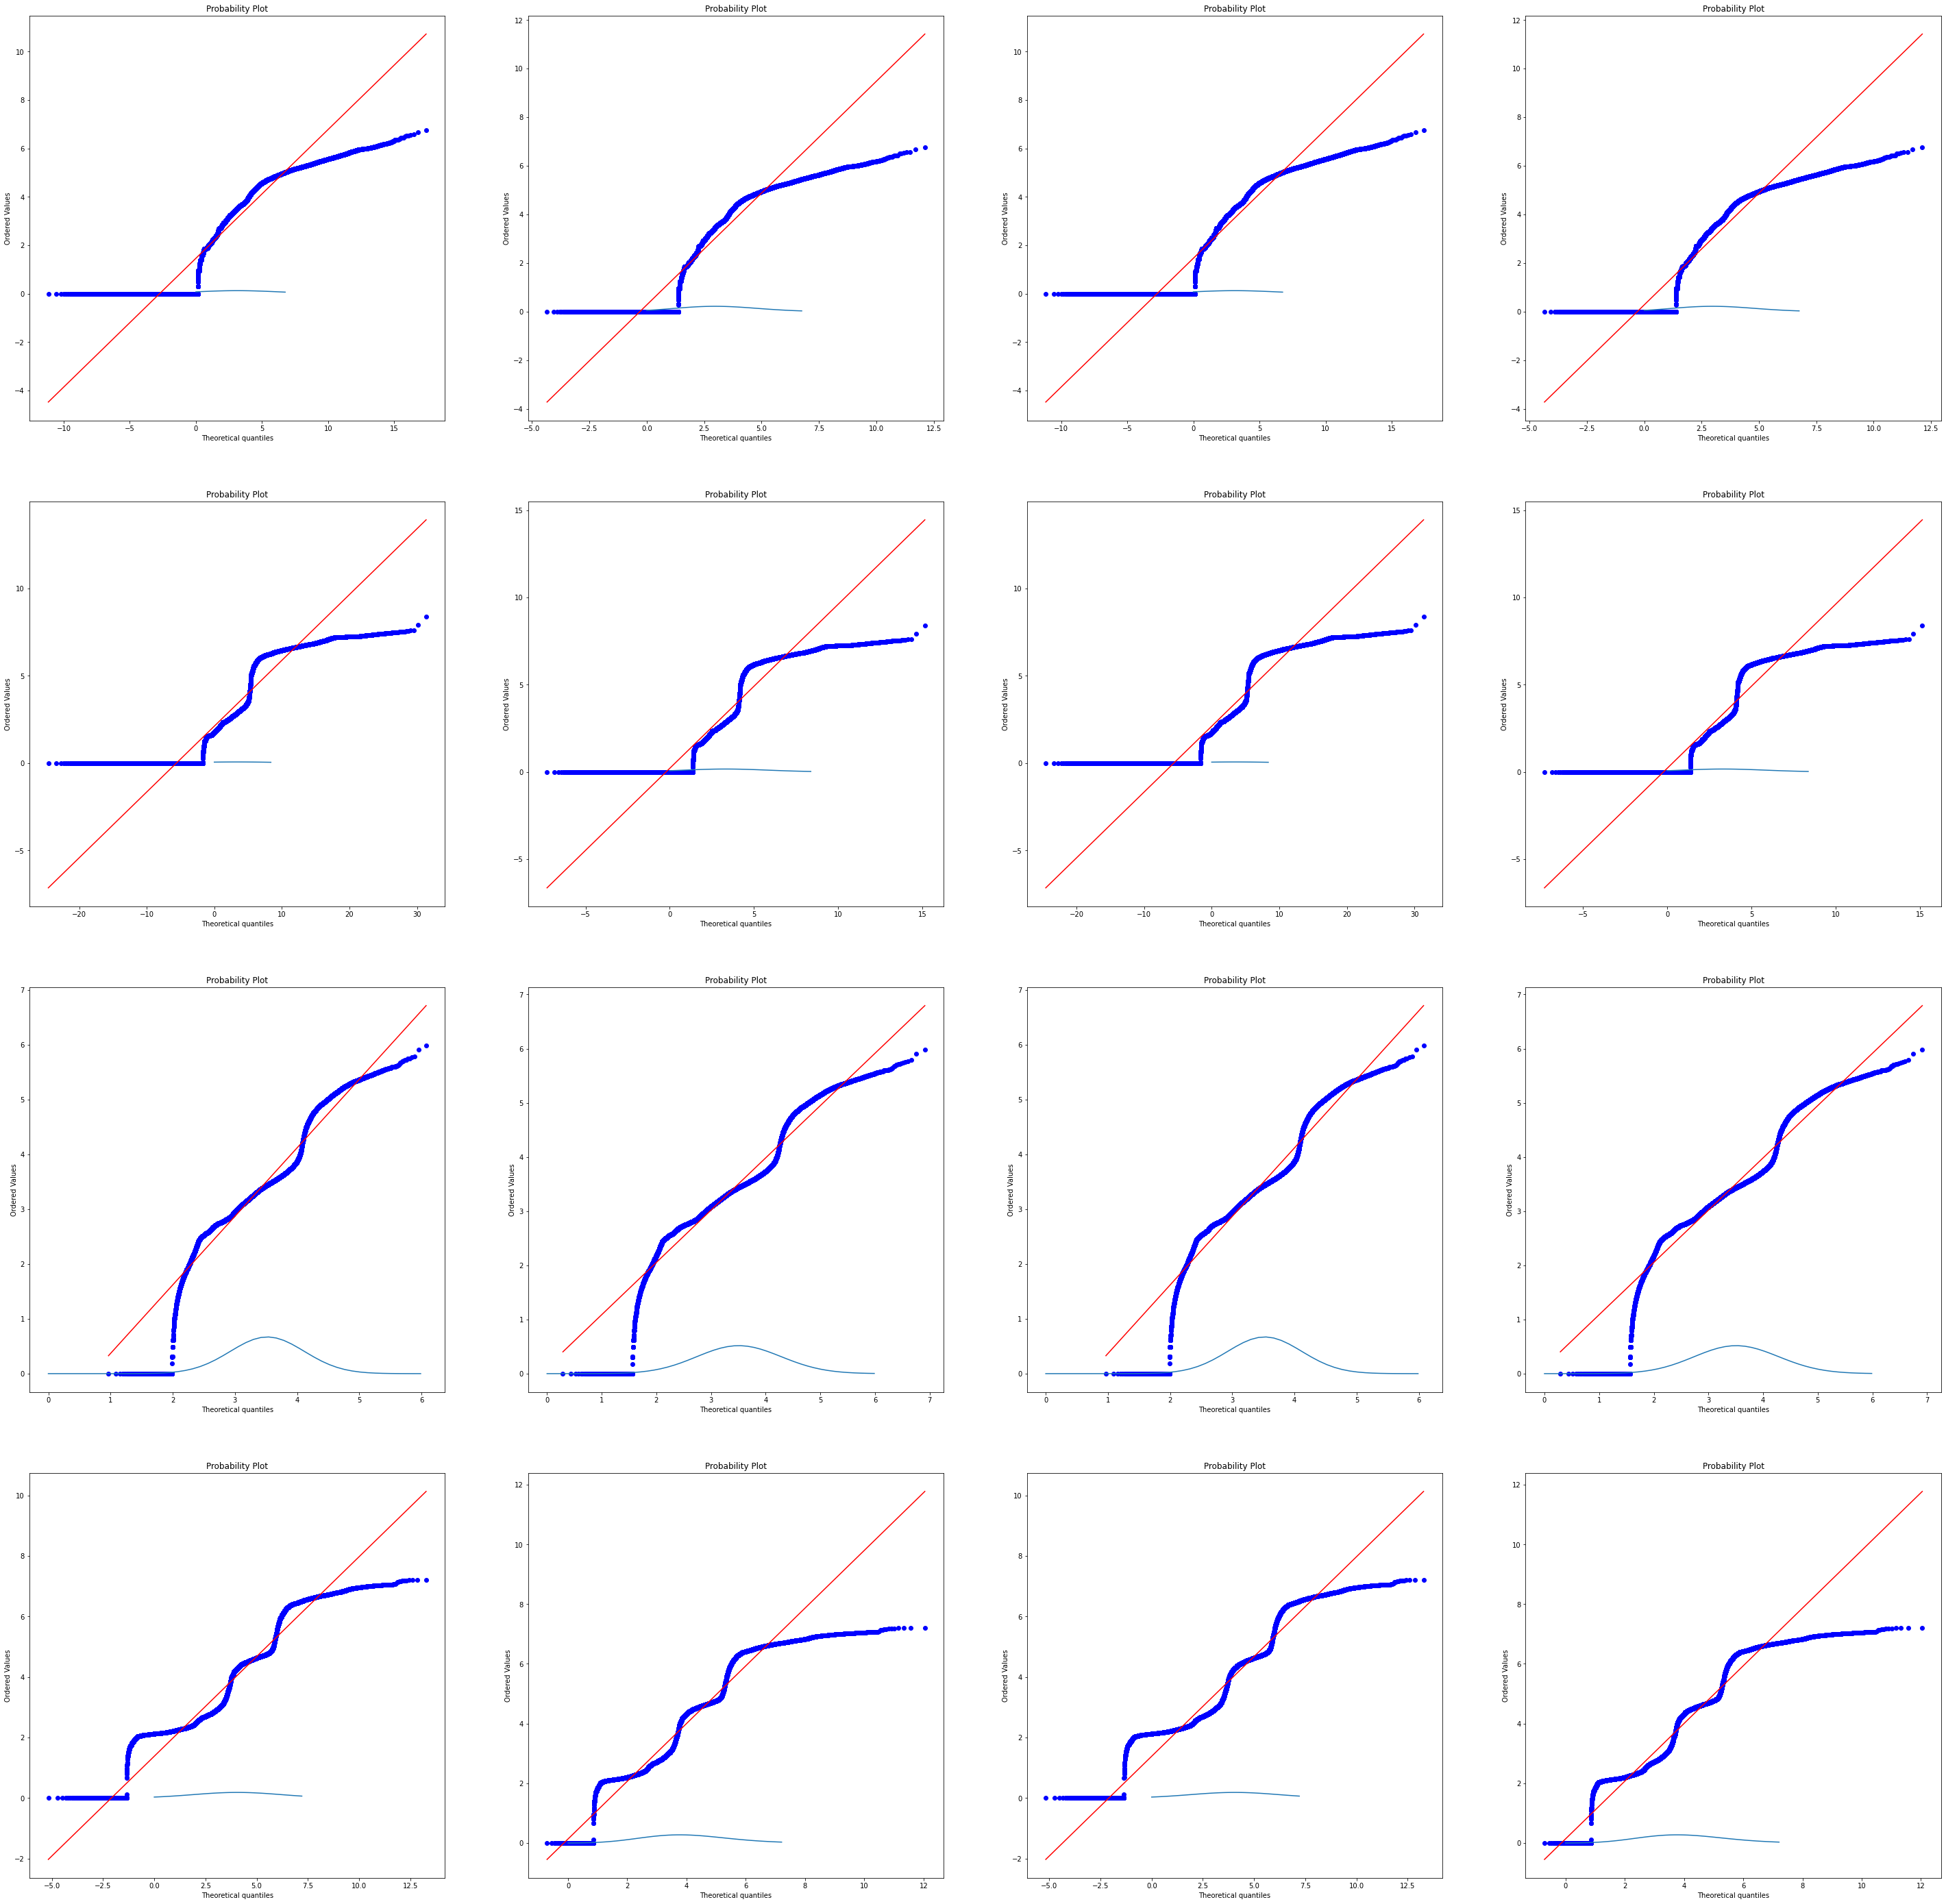

In [7]:
from scipy.stats import probplot

fig, ax = plt.subplots(4, 4, figsize=(50, 50))

i = 0
for ds in [ds_1, ds_2, ds_3, ds_4, ds_5, ds_6, ds_7, ds_8]:
    if i == 0 or i == 1:
        result = 0
    elif i == 2 or i == 3:
        result = 1
    elif i == 4 or i == 5:
        result = 2
    elif i == 6 or i == 7:
        result = 3
    probplot(ds, dist=norm(gaussiana_mean[i], gaussiana_var[i]), plot=ax[result][i%2*2])
    x = np.linspace(min(ds), max(ds))
    ax[result][i%2*2].plot(x, norm.pdf(x, gaussiana_mean[i], gaussiana_var[i]))

    probplot(ds, dist=gamma(mle_gamma[i][0], mle_gamma[i][1], mle_gamma[i][2]), plot=ax[result][i%2*2+1])
    x = np.linspace(min(ds), max(ds))
    ax[result][i%2*2+1].plot(x, gamma.pdf(x, mle_gamma[i][0],  mle_gamma[i][1], mle_gamma[i][2]))
    i += 1
    

plt.show()